In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading csv
df = pd.read_csv("Student_Performance.csv")

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
# checking for data types
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [6]:
df.shape

(10000, 6)

In [7]:
# Checking for missing value
df.isna().sum().sum()

0

In [8]:
# Checking duplicates
df.duplicated().sum()

127

In [9]:
# Droping Duplicates
df = df.drop_duplicates()

In [10]:
# Checking duplicates
df.duplicated().sum()

0

### Univariate Analysis


In [11]:
numerical_col = df.select_dtypes("int64", "float64")

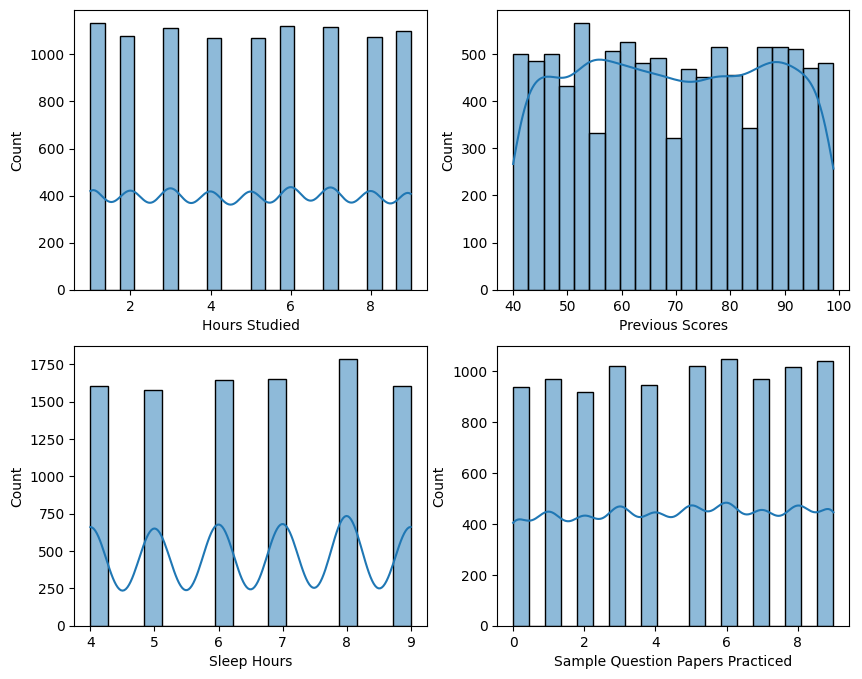

In [12]:
i = 1
plt.figure(figsize=(10, 8))
for col in numerical_col:
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    i += 1
plt.show()

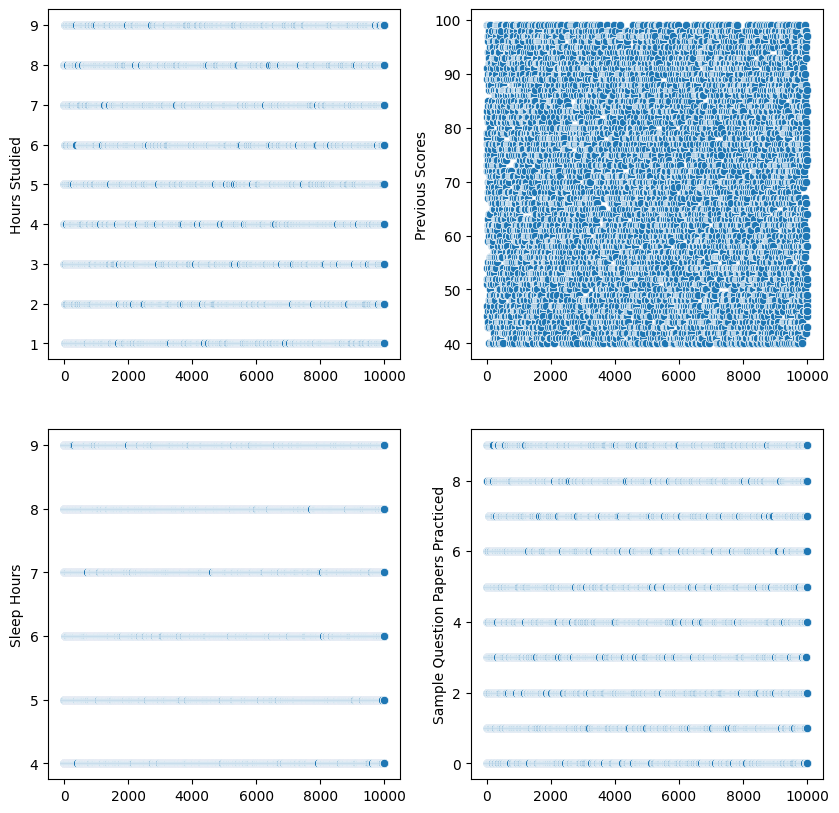

In [13]:
i = 1
plt.figure(figsize=(10, 10))
for col in numerical_col:
    plt.subplot(2, 2, i)
    sns.scatterplot(df[col])
    i += 1
plt.show()


<Figure size 800x800 with 0 Axes>

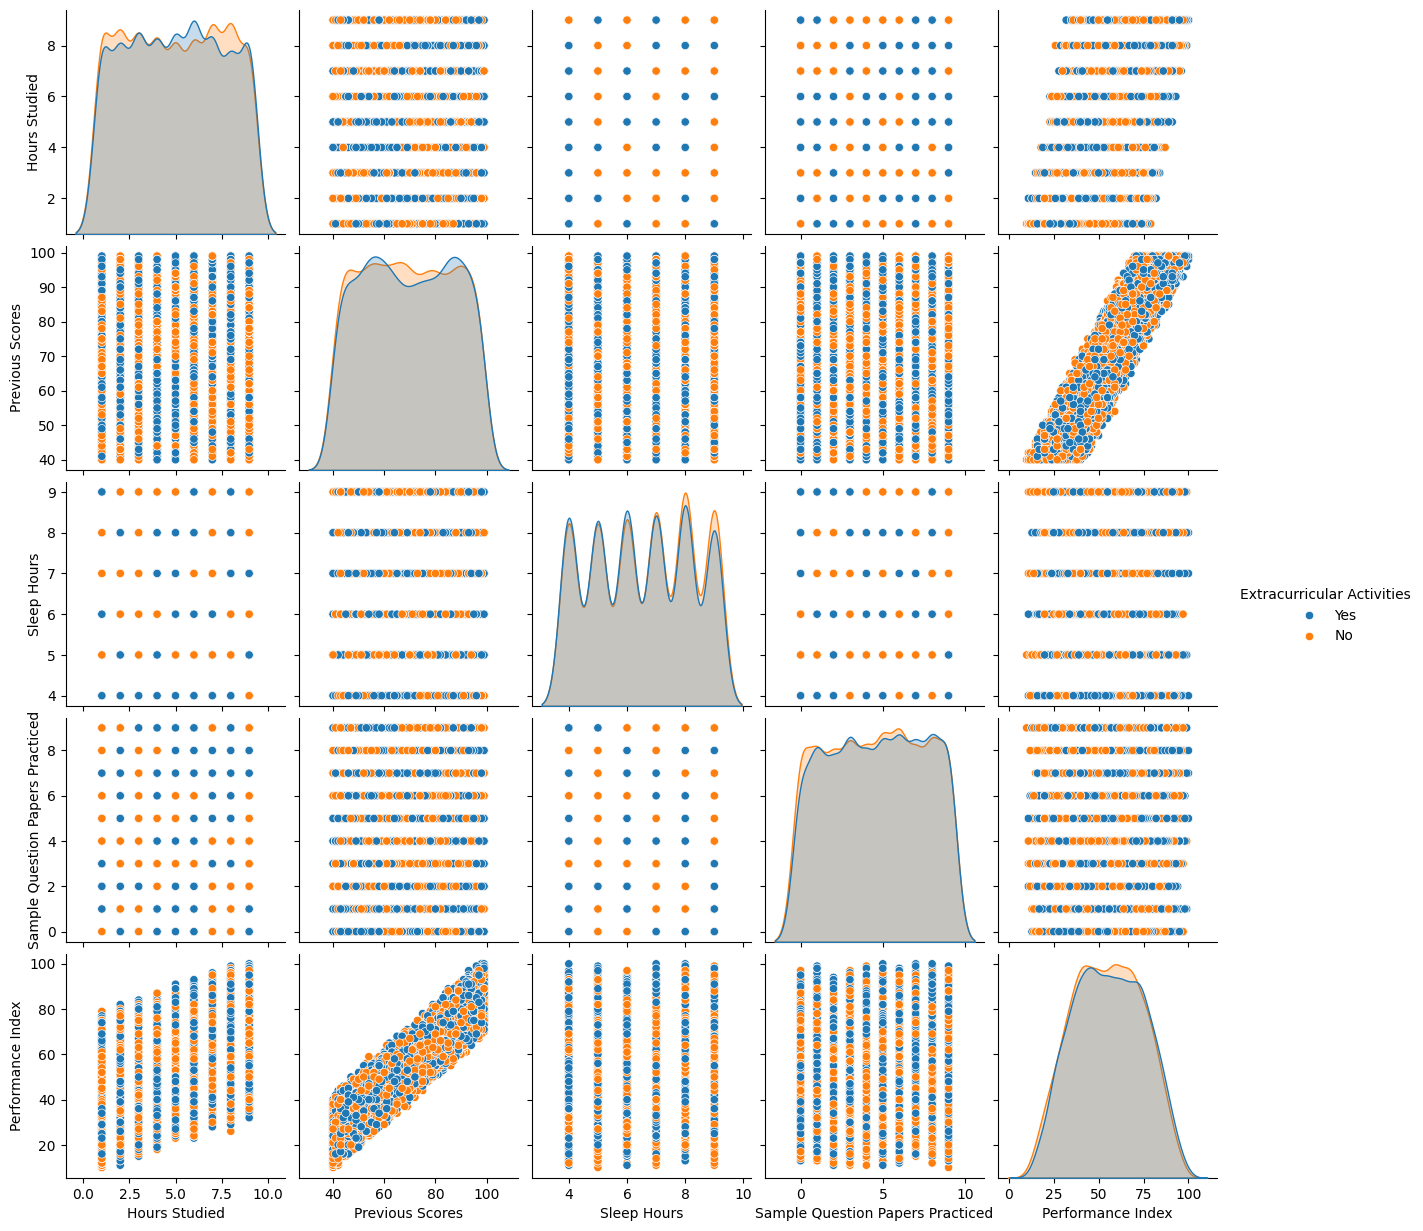

In [14]:
plt.figure(figsize=(8, 8))

sns.pairplot(df, hue="Extracurricular Activities")

plt.show()


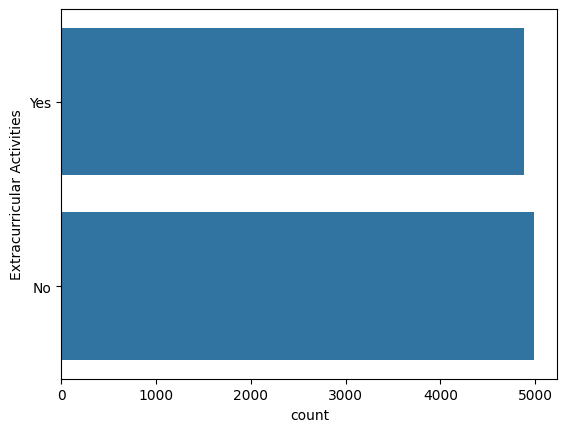

In [15]:
sns.countplot(df["Extracurricular Activities"])
plt.show()

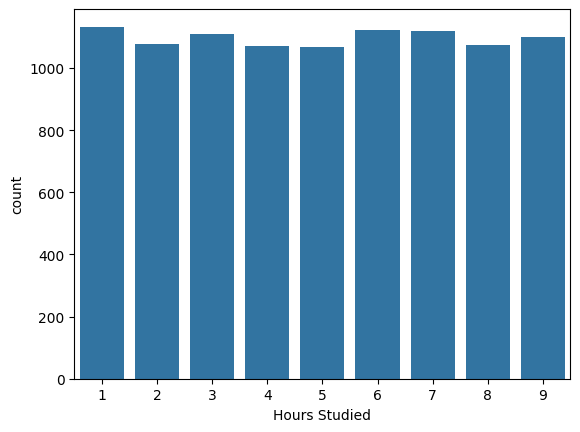

In [16]:
# count of students on how much they have studied
sns.barplot(data=df["Hours Studied"].value_counts())
plt.show()

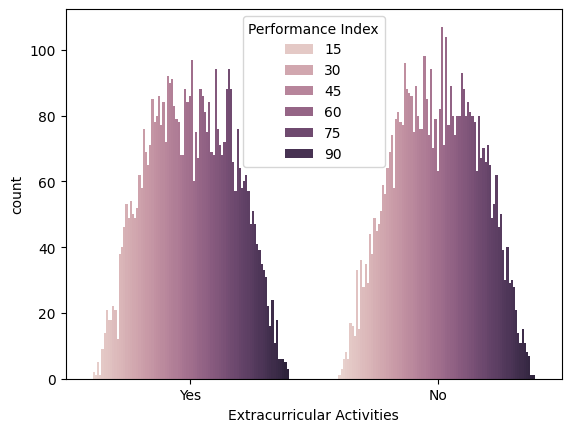

In [17]:
sns.countplot(data=df, x="Extracurricular Activities", hue=df["Performance Index"])
plt.show()

In [18]:
yes_students = df.groupby("Extracurricular Activities").get_group("Yes")

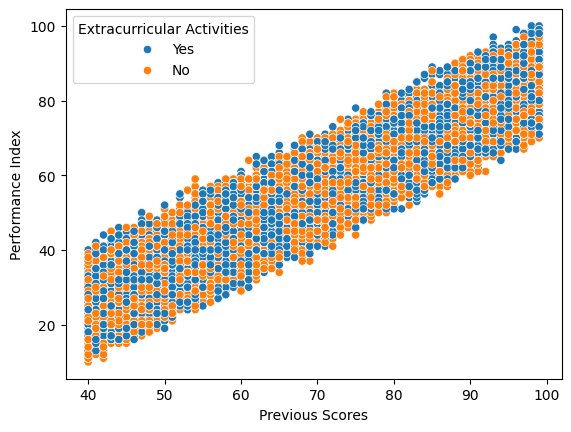

In [19]:
sns.scatterplot(
    data=df,
    y="Performance Index",
    x="Previous Scores",
    hue="Extracurricular Activities",
)
plt.show()

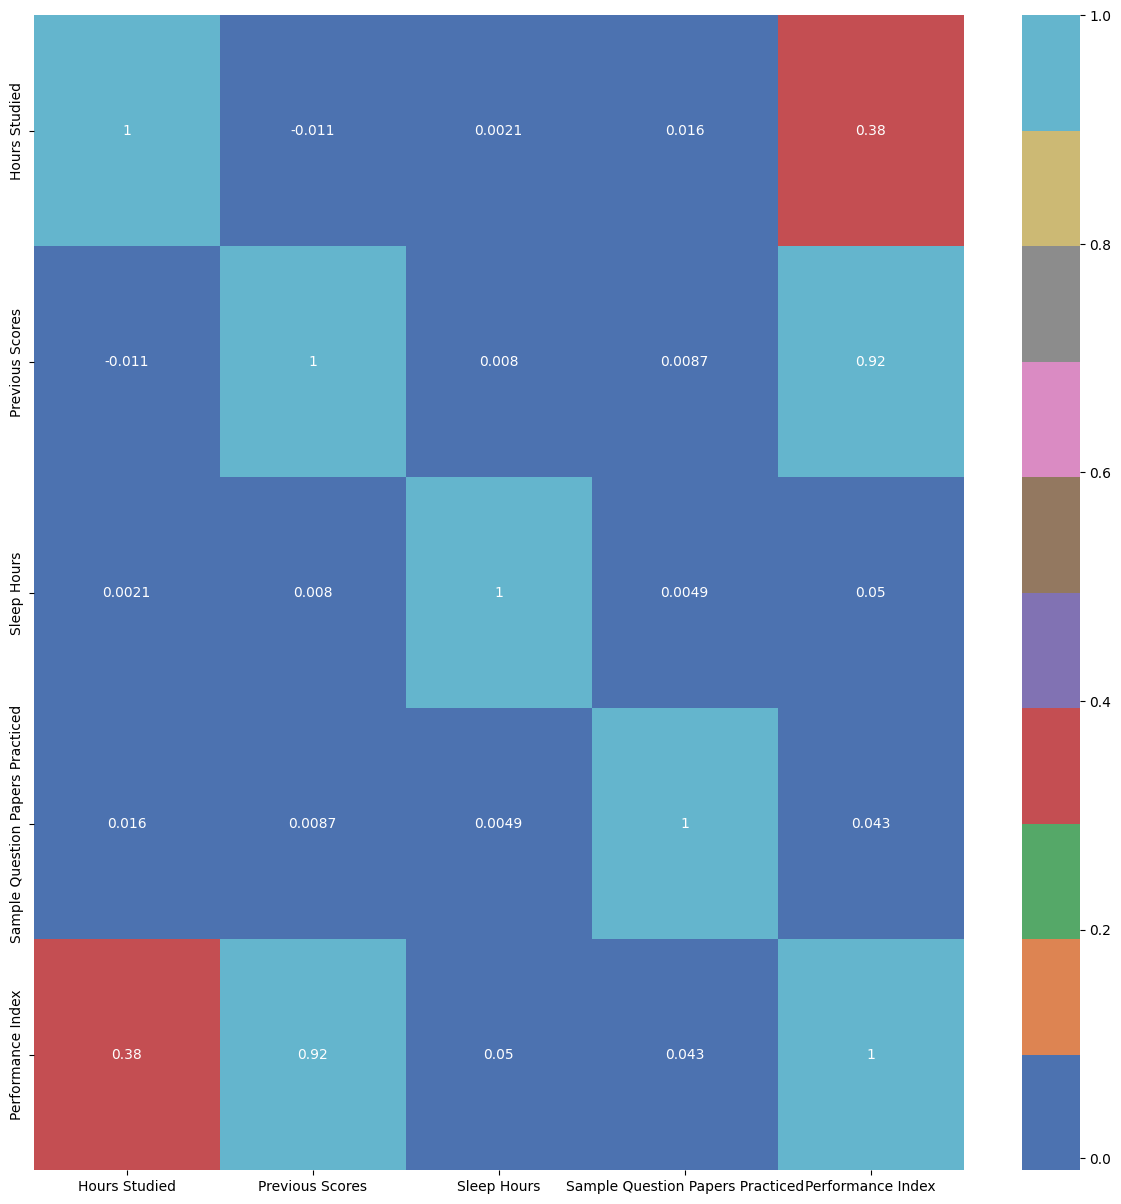

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    data=df.drop("Extracurricular Activities", axis=1).corr(),
    annot=True,
    cmap=sns.color_palette("deep", as_cmap=True),
)
plt.show()


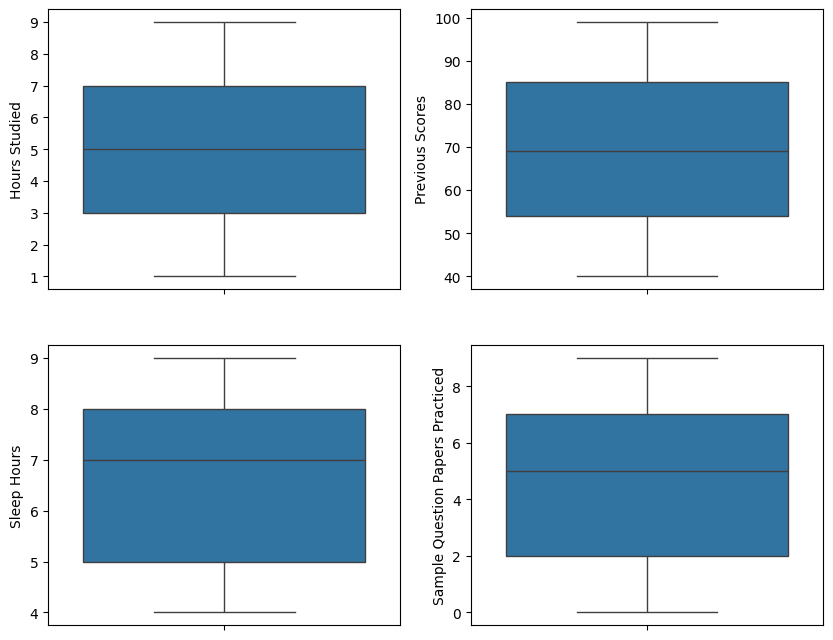

In [21]:
i = 1
plt.figure(figsize=(10, 8))
for col in numerical_col:
    plt.subplot(2, 2, i)
    sns.boxplot(df[col])
    i += 1
plt.show()


### Encoding


In [22]:
target_map = {"Yes": 1, "No": 0}
df["Extracurricular Activities"] = df["Extracurricular Activities"].map(target_map)

In [23]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


Dividing Feturees & Target


In [24]:
feature = df.drop("Performance Index", axis=1)
target = df["Performance Index"]

### Spliting Data


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.2, random_state=0
)

### Scaling Data


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler_std = StandardScaler()

In [29]:
feature.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

In [30]:
feature[feature.columns] = scaler_std.fit_transform(feature)

In [31]:
feature

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775566,1.706168,1.010078,1.454025,-1.249715
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925
2,1.161822,-1.064438,1.010078,0.275889,-0.900925
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925
4,0.775566,0.320865,-0.990022,0.864957,0.145444
...,...,...,...,...,...
9995,-1.541976,-1.179880,1.010078,-1.491315,-0.900925
9996,0.775566,-0.314066,1.010078,0.864957,0.145444
9997,0.389309,0.782633,1.010078,0.864957,0.145444
9998,1.548079,1.590727,1.010078,0.275889,-1.598505


## Model Building


### Linear Regression


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

test_pred1 = model.predict(X_test)
train_pred1 = model.predict(X_train)

print(f"Training R2 score: {round(r2_score(y_train, train_pred1)*100, 2)}")
print(f"Test R2 score: {round(r2_score(y_test, test_pred1)*100, 2)}")

Training R2 score: 98.89
Test R2 score: 98.78


### KNN Model


In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [35]:
KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train, y_train)

test_pred2 = KNN_model.predict(X_test)
train_pred2 = KNN_model.predict(X_train)

print(f"Training R2 score: {round(r2_score(y_train, train_pred2)*100, 2)}")
print(f"Test R2 score: {round(r2_score(y_test, test_pred2)*100, 2)}")

Training R2 score: 98.88
Test R2 score: 98.25


### Decision Tree Model


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [37]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train)

train_pred3 = DT_model.predict(X_train)
test_pred3 = DT_model.predict(X_test)

print(f"Training R2 score: {round(r2_score(y_train, train_pred3)*100, 2)}")
print(f"Test R2 score: {round(r2_score(y_test, test_pred3)*100, 2)}")

Training R2 score: 99.93
Test R2 score: 97.39


In [38]:
scores = pd.DataFrame(
    {
        "Model": ["Linear Regression", "KNN_model", "Decision Tree Regressor"],
        "train_scores": [
            round(r2_score(y_train, train_pred1) * 100, 2),
            round(r2_score(y_train, train_pred2) * 100, 2),
            round(r2_score(y_train, train_pred3) * 100, 2),
        ],
        "test_scores": [
            round(r2_score(y_test, test_pred1) * 100, 2),
            round(r2_score(y_test, test_pred2) * 100, 2),
            round(r2_score(y_test, test_pred3) * 100, 2),
        ],
    }
)


In [39]:
scores

,Model,train_scores,test_scores
0,Linear Regression,98.89,98.78
1,KNN_model,98.88,98.25
2,Decision Tree Regressor,99.93,97.39


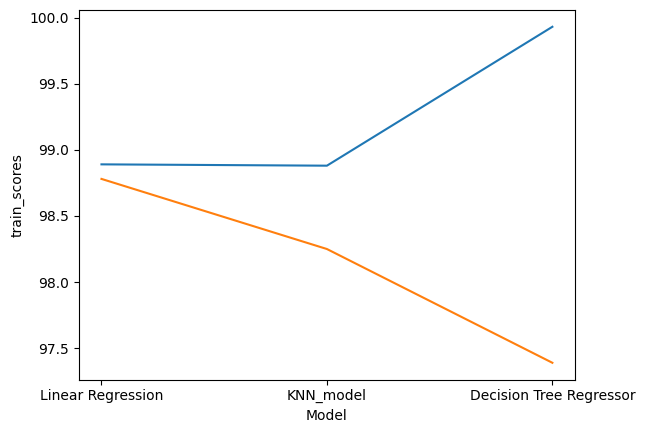

In [40]:
sns.lineplot(data=scores, x="Model", y="train_scores")
sns.lineplot(data=scores, x="Model", y="test_scores")
plt.show()

In [5]:
[(g + str(n)) for g in ["A", "B", "C", "D", "E", "F", "G"] for n in range(1, 6)]

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']